# Notebook for first EDA Project "House Prices in King County"

In [1]:
%reset -fs

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

# for variable transformation
import scipy.stats as stats

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

%matplotlib inline


# First Look into the Data

## Variable Overview

| Variable | Definition                                 | Key                                            | Type        |
|:----------|:--------------------------------------------|:------------------------------------------------|-------------|
| id | unique identified for a house                    |                                           | ordnial     |
| date       | house was sold                           |                                                | datetime     |
| price     |      house price - to predict             |                                                | intervaal |
| bedrooms  | number of Bedrooms/House                  |                                                | ratio       |
| bathrooms | number of bathrooms/bedrooms              |                                                | ratio       |
| sqft_living   |       footage of the home             |                                                | ratio         |
| sqft_lot   |     footage of the lot                   |                                                | ratio     |
| floors    |   total floors (levels) in house          |                                                | ratio       |
|waterfront | object with waterfront view  |                                                | nominal     |
| view      |   object has been viewed                   |                                                |nominal |
|condition  |  how good the condition is ( Overall )    |                                                | ordinal  
| grade     |  overall grade given to the housing unit, based on King County grading system  |                                                | ordinal  
| sqft_above  | square footage of house apart from basement   |                                                | ratio  
| sqft_basement  | square footage of the basement        |                                                | ratio  
| yr_built  |    year the object was built                            |                                                | interval 
| yr_renovated  |  year when the object was renovated         |                                                | interval 
| zipcode  |      zip code                              |                                                | ordinal 
| lat      |    latitude coordinate                     |                                                | ratio 
| long     |    longitude coordinate                    |                                                | ratio 
| sqft_living15  |  square footage of interior housing living space for the nearest 15 neighbors   |                         | ratio 
| sqft_lot15  | square footage of the land lots of the nearest 15 neighbors |                                                | ratio 

## Import the data into a pandas dataframe

In [3]:
hp = pd.read_csv('King_County_House_prices_dataset.csv')
hp

id        date      price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014   221900.0         3       1.00         1180   
1      6414100192   12/9/2014   538000.0         3       2.25         2570   
2      5631500400   2/25/2015   180000.0         2       1.00          770   
3      2487200875   12/9/2014   604000.0         4       3.00         1960   
4      1954400510   2/18/2015   510000.0         3       2.00         1680   
5      7237550310   5/12/2014  1230000.0         4       4.50         5420   
6      1321400060   6/27/2014   257500.0         3       2.25         1715   
7      2008000270   1/15/2015   291850.0         3       1.50         1060   
8      2414600126   4/15/2015   229500.0         3       1.00         1780   
9      3793500160   3/12/2015   323000.0         3       2.50         1890   
10     1736800520    4/3/2015   662500.0         3       2.50         3560   
11     9212900260   5/27/2014   468000.0         2       1.00         1160   
12      114101516   5/28/2014   310000.0         3       1.00         1430   
13     6054650070   10/7/2014   400000.0         3       1.75         1370   
14     1175000570   3/12/2015   530000.0         5       2.00         1810   
15     9297300055   1/24/2015   650000.0         4       3.00         2950   
16     1875500060   7/31/2014   395000.0         3       2.00         1890   
17     6865200140   5/29/2014   485000.0         4       1.00         1600   
18       16000397   12/5/2014   189000.0         2       1.00         1200   
19     7983200060   4/24/2015   230000.0         3       1.00         1250   
20     6300500875   5/14/2014   385000.0         4       1.75         1620   
21     2524049179   8/26/2014  2000000.0         3       2.75         3050   
22     7137970340    7/3/2014   285000.0         5       2.50         2270   
23     8091400200   5/16/2014   252700.0         2       1.50         1070   
24     3814700200  11/20/2014   329000.0         3       2.25         2450   
25     1202000200   11/3/2014   233000.0         3       2.00         1710   
26     1794500383   6/26/2014   937000.0         3       1.75         2450   
27     3303700376   12/1/2014   667000.0         3       1.00         1400   
28     5101402488   6/24/2014   438000.0         3       1.75         1520   
29     1873100390    3/2/2015   719000.0         4       2.50         2570   
...           ...         ...        ...       ...        ...          ...   
21567  2025049203   6/10/2014   399950.0         2       1.00          710   
21568   952006823   12/2/2014   380000.0         3       2.50         1260   
21569  3832050760   8/28/2014   270000.0         3       2.50         1870   
21570  2767604724  10/15/2014   505000.0         2       2.50         1430   
21571  6632300207    3/5/2015   385000.0         3       2.50         1520   
21572  2767600688  11/13/2014   414500.0         2       1.50         1210   
21573  7570050450   9/10/2014   347500.0         3       2.50         2540   
21574  7430200100   5/14/2014  1220000.0         4       3.50         4910   
21575  4140940150   10/2/2014   572000.0         4       2.75         2770   
21576  1931300412   4/16/2015   475000.0         3       2.25         1190   
21577  8672200110   3/17/2015  1090000.0         5       3.75         4170   
21578  5087900040  10/17/2014   350000.0         4       2.75         2500   
21579  1972201967  10/31/2014   520000.0         2       2.25         1530   
21580  7502800100   8/13/2014   679950.0         5       2.75         3600   
21581   191100405   4/21/2015  1580000.0         4       3.25         3410   
21582  8956200760  10/13/2014   541800.0         4       2.50         3118   
21583  7202300110   9/15/2014   810000.0         4       3.00         3990   
21584   249000205  10/15/2014  1540000.0         5       3.75         4470   
21585  5100403806    4/7/2015   467000.0         3       2.50         1425   
21586   844000965   6/26/2014   22400

## Get a basic overview over the data

In [4]:
print("Number of rows and coloumns in the House Pricing data set: ", hp.shape)

Number of rows and coloumns in the House Pricing data set:  (21597, 21)


In [5]:
hp.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [6]:
hp.tail()

id        date     price  bedrooms  bathrooms  sqft_living  \
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
21592      1131     3.0         0.0   0.0  ...      8        1530   
21593      5813     2.0         0.0   0.0  ...      8        2310   
21594      1350     2.0         0.0   0.0  ...      7        1020   
21595      2388     2.0         NaN   0.0  ...      8        1600   
21596      1076     2.0         0.0   0.0  ...      7        1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[5 rows x 21 columns]

In [7]:
hp.sample(10) #get a random sample from inbetween

id       date     price  bedrooms  bathrooms  sqft_living  \
11507  2450000320  5/23/2014  607000.0         3       1.00         1230   
719    4233400400  4/14/2015  267000.0         3       2.00         1300   
5396   2423069120   5/8/2014  295000.0         2       1.75         2200   
19815  2895730070  6/20/2014  925000.0         4       2.75         3730   
9897   1123059116  3/19/2015  518000.0         4       2.50         2790   
8612   5101404444  4/14/2015  564000.0         5       2.25         2140   
19997  9524100207  1/30/2015  245000.0         2       1.50          690   
15815  5360200052  2/24/2015  499950.0         3       2.50         2580   
5559   2459950010  7/22/2014  258000.0         3       2.00         1390   
11829  2011400520  6/19/2014  240000.0         4       2.00         1790   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
11507      8114     1.0         0.0   0.0  ...      7        1230   
719        9644     1.0         0.0   0.0  ...      7        1300   
5396      89298     1.0         0.0   0.0  ...      7        1100   
19815      8014     2.0         NaN   0.0  ...     10        3730   
9897       9910     2.0         0.0   0.0  ...      8        2790   
8612       8700     1.0         0.0   2.0  ...      8        1220   
19997      1058     2.0         0.0   0.0  ...      7         690   
15815     23925     2.0         0.0   0.0  ...      9        2580   
5559       7200     1.0         0.0   0.0  ...      7        1390   
11829     14690     1.0         NaN   1.0  ...      7        1670   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
11507            0.0     1951           0.0    98004  47.5822 -122.196   
719              0.0     1994           NaN    98010  47.3131 -121.998   
5396          1100.0     1973           0.0    98027  47.4633 -121.976   
19815            0.0     2012           0.0    98074  47.6036 -122.059   
9897             0.0     2003           0.0    98059  47.4891 -122.141   
8612           920.0     1962           0.0    98115  47.6969 -122.310   
19997            0.0     2005           0.0    98103  47.6951 -122.343   
15815            0.0     2001           0.0    98023  47.2978 -122.376   
5559             0.0     1996           0.0    98058  47.4340 -122.154   
11829          120.0     1960           0.0    98198  47.3965 -122.321   

       sqft_living15  sqft_lot15  
11507           2220        8114  
719             1430        9656  
5396            2590       89298  
19815           3670        8279  
9897            2590        9910  
8612            1720        6670  
19997            690        1058  
15815           1660        8460  
5559            1630        7340  
11829           2440       10664  

[10 rows x 21 columns]

## Data Types

In [8]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [9]:
hp['sqft_basement'] = pd.to_numeric(hp['sqft_basement'],errors='coerce')
hp.sqft_basement

0           0.0
1         400.0
2           0.0
3         910.0
4           0.0
5        1530.0
6           NaN
7           0.0
8         730.0
9           0.0
10       1700.0
11        300.0
12          0.0
13          0.0
14          0.0
15        970.0
16          0.0
17          0.0
18          NaN
19          0.0
20        760.0
21        720.0
22          0.0
23          0.0
24          0.0
25          0.0
26        700.0
27          0.0
28        730.0
29          0.0
          ...  
21567       0.0
21568     320.0
21569       0.0
21570       0.0
21571       0.0
21572     190.0
21573       0.0
21574    1800.0
21575       0.0
21576       0.0
21577       0.0
21578       0.0
21579      50.0
21580       0.0
21581       NaN
21582       0.0
21583       0.0
21584       0.0
21585       0.0
21586       0.0
21587       0.0
21588       0.0
21589       0.0
21590     910.0
21591     130.0
21592       0.0
21593       0.0
21594       0.0
21595       0.0
21596       0.0
Name: sqft_basement, Len

In [10]:
type(hp.sqft_basement[1])

numpy.float64

In [11]:
type(hp.date[1])

str

In [12]:
print(hp.date) 

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
5         5/12/2014
6         6/27/2014
7         1/15/2015
8         4/15/2015
9         3/12/2015
10         4/3/2015
11        5/27/2014
12        5/28/2014
13        10/7/2014
14        3/12/2015
15        1/24/2015
16        7/31/2014
17        5/29/2014
18        12/5/2014
19        4/24/2015
20        5/14/2014
21        8/26/2014
22         7/3/2014
23        5/16/2014
24       11/20/2014
25        11/3/2014
26        6/26/2014
27        12/1/2014
28        6/24/2014
29         3/2/2015
            ...    
21567     6/10/2014
21568     12/2/2014
21569     8/28/2014
21570    10/15/2014
21571      3/5/2015
21572    11/13/2014
21573     9/10/2014
21574     5/14/2014
21575     10/2/2014
21576     4/16/2015
21577     3/17/2015
21578    10/17/2014
21579    10/31/2014
21580     8/13/2014
21581     4/21/2015
21582    10/13/2014
21583     9/15/2014
21584    10/15/2014
21585      4/7/2015


In [13]:
import datetime as dt
hp['date'] = pd.to_datetime(hp['date'])
#X['date']= X['date'].map(dt.datetime.toordinal)

In [14]:
type(hp.date[1])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
#extract year

hp['year_sold'] = hp['date'].dt.year

In [16]:
#extract month
hp['month_sold'] = hp['date'].dt.month

In [17]:
hp.head(2)

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   

   sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
0      5650     1.0         NaN   0.0  ...            0.0      1955   
1      7242     2.0         0.0   0.0  ...          400.0      1951   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0           0.0    98178  47.5112 -122.257           1340        5650   
1        1991.0    98125  47.7210 -122.319           1690        7639   

   year_sold  month_sold  
0       2014          10  
1       2014          12  

[2 rows x 23 columns]

## Basic Statistics 

In [18]:
hp.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

       ...  sqft_basement      yr_built  yr_renovated       zipcode  \
count  ...   21143.000000  21597.000000  17755.000000  21597.000000   
mean   ...     291.851724   1970.999676     83.636778  98077.951845   
std    ...     442.498337     29.375234    399.946414     53.513072   
min    ...       0.000000   1900.000000      0.000000  98001.000000   
25%    ...       0.000000   1951.000000      0.000000  98033.000000   
50%    ...       0.000000   1975.000000      0.000000  98065.000000   
75%    ...     560.000000   1997.000000      0.000000  98118.000000   
max    ...    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15     year_sold  \
count  21597.000000  21597.000000   21597.000000   21597.000000  21597.000000   
mean      47.560093   -122.213982    1986.620318   12758.283512   2014.322962   
std        0.138552      0.140724     685.230472   27274.441950      0.467619   
min       47.155900   -122.519000     399.000000     651.000000   2014.000000   
25%       47.471100   -122.328000    1490.000000    5100.000000   2014.000000   
50%       47.571800   -122.231000    1840.000000    7620.000000   2014.000000   
75%       47.678000   -122.125000    2360.000000   10083.000000   2015.000000   
max       47.777600   -121.315000    6210.000000  871200.000000   2015.000000   

         month_sold  
count  21597.000000  
mean       6.573969  
std        3.115061  
min        1.000000  
25%        4.000000  
50%        6.000000  
75%        9.000000  
max       12.000000  

[8 rows x 22 columns]

Year most houses have been built:

In [19]:
hp.yr_built.mode()

0    2014
dtype: int64

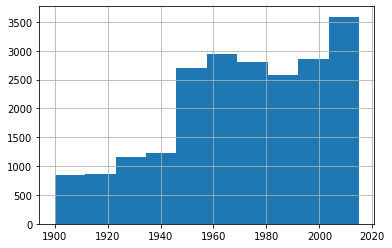

In [20]:
hp.yr_built.hist()

Average living space:

In [21]:
hp.sqft_living.mean()

2080.3218502569803

In [22]:
hp.price.mean()

540296.5735055795

In [23]:
hp.price.max()

7700000.0

In [24]:
hp['yr_old'] = 2020 - hp.yr_built
hp.yr_old

0         65
1         69
2         87
3         55
4         33
5         19
6         25
7         57
8         60
9         17
10        55
11        78
12        93
13        43
14       120
15        41
16        26
17       104
18        99
19        51
20        73
21        52
22        25
23        35
24        35
25        79
26       105
27       111
28        72
29        15
        ... 
21567     77
21568     13
21569     11
21570     11
21571     14
21572     13
21573     10
21574     13
21575      6
21576     12
21577     14
21578     12
21579     14
21580      6
21581     13
21582      6
21583     17
21584     12
21585     12
21586      6
21587     17
21588      6
21589      6
21590     11
21591     12
21592     11
21593      6
21594     11
21595     16
21596     12
Name: yr_old, Length: 21597, dtype: int64

In [25]:
hp.yr_old.mean()

49.000324119090614

In [26]:
hp.yr_old.max()

120

# Missing Values

In [27]:
hp.isnull().sum() #im folgenden namen des datensatzes ändern, damit man die fehlenden werte noch sieht

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
year_sold           0
month_sold          0
yr_old              0
dtype: int64

In [28]:
missing = pd.DataFrame(hp.isnull().sum(),columns=['Number'])
missing['Percentage'] = round(missing.Number/hp.shape[0]*100,1)
missing[missing.Number!=0]


Number  Percentage
waterfront       2376        11.0
view               63         0.3
sqft_basement     454         2.1
yr_renovated     3842        17.8

There are **2376 missing values** in *waterfront* and **3842 missing values** for the *renovation year* and **63 missing values** for *houseview*.

+ **waterfront** has 11 percent missing values
+ **view** has 0.3 percent missing values
+ **yr_renovated** has 17.8 percent missing values

In [29]:
hp.waterfront.nunique()

2

In [30]:
hp.waterfront.unique()

array([nan,  0.,  1.])

We can't ignore the waterfront variable since a lake view is considered a positive living aspect and might influence the house price. We cannot ignore the renovation year either, since this might indicate a higher value in old housings as well. 

In [31]:
hp.condition.unique()

array([3, 5, 4, 1, 2])

Inserting the mode for null-values:

In [32]:
hp['waterfront'] = hp['waterfront'].fillna(hp['waterfront'].mode()[0])
hp['view'] = hp['view'].fillna(hp['view'].mode()[0])
hp['yr_renovated'] = hp['yr_renovated'].fillna(hp['yr_renovated'].mode()[0])
hp['sqft_basement'] = hp['sqft_basement'].fillna(hp['sqft_basement'].mode()[0])

In [33]:
hp.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year_sold        0
month_sold       0
yr_old           0
dtype: int64

# Feature Engineering

## Creating New Features

Adjusting data type of basement size *sqft_basement*:

In [34]:
type(hp.sqft_basement[1])

numpy.float64

Built new variable of the total size of real estate property *sqft_total_property* :

In [35]:
hp['sqft_total_property'] = hp['sqft_living']+ hp['sqft_lot'] + hp['sqft_basement']
hp.head(2)

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   

   sqft_lot  floors  waterfront  view  ...  yr_renovated  zipcode      lat  \
0      5650     1.0         0.0   0.0  ...           0.0    98178  47.5112   
1      7242     2.0         0.0   0.0  ...        1991.0    98125  47.7210   

      long  sqft_living15  sqft_lot15  year_sold  month_sold  yr_old  \
0 -122.257           1340        5650       2014          10      65   
1 -122.319           1690        7639       2014          12      69   

   sqft_total_property  
0               6830.0  
1              10212.0  

[2 rows x 25 columns]

## Types of Variables

In [36]:
# find categorical variables
categorical = [var for var in hp.columns if hp[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [37]:
# find numerical variables
numerical = [var for var in hp.columns if hp[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 25 numerical variables


Numerical variables can be binary, continuous or discrete. A priori, it is good practice to know what each variable means, to then be able to differentiate continuous from discrete variables.

In [38]:
# let's visualise the values of the discrete variables

discrete = []
for var in numerical:
    if len(hp[var].unique())<20:
        print(var, ' values: ', hp[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

bedrooms  values:  [ 3  2  4  5  1  6  7  8  9 11 10 33]
floors  values:  [1.  2.  1.5 3.  2.5 3.5]
waterfront  values:  [0. 1.]
view  values:  [0. 3. 4. 2. 1.]
condition  values:  [3 5 4 1 2]
grade  values:  [ 7  6  8 11  9  5 10 12  4  3 13]
year_sold  values:  [2014 2015]
month_sold  values:  [10 12  2  5  6  1  4  3  7  8 11  9]
There are 8 discrete variables


grade, value, condition and waterfront are obviously categorical variables. We need to transform them. 

In [39]:
#transform discrete variable to categorical

hp.grade.astype('category')

0         7
1         7
2         6
3         7
4         8
5        11
6         7
7         7
8         7
9         7
10        8
11        7
12        7
13        7
14        7
15        9
16        7
17        7
18        7
19        7
20        7
21        9
22        8
23        7
24        8
25        6
26        8
27        8
28        7
29        8
         ..
21567     7
21568     7
21569     7
21570     8
21571     8
21572     8
21573     8
21574    11
21575     8
21576     8
21577    10
21578     8
21579     8
21580     9
21581    10
21582     9
21583     9
21584    11
21585     8
21586     6
21587     8
21588     8
21589     9
21590     9
21591     8
21592     8
21593     8
21594     7
21595     8
21596     7
Name: grade, Length: 21597, dtype: category
Categories (11, int64): [3, 4, 5, 6, ..., 10, 11, 12, 13]

In [40]:
hp.waterfront.astype('category')

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
21567    0.0
21568    0.0
21569    0.0
21570    0.0
21571    0.0
21572    0.0
21573    0.0
21574    0.0
21575    0.0
21576    0.0
21577    0.0
21578    0.0
21579    0.0
21580    0.0
21581    0.0
21582    0.0
21583    0.0
21584    0.0
21585    0.0
21586    0.0
21587    0.0
21588    0.0
21589    0.0
21590    0.0
21591    0.0
21592    0.0
21593    0.0
21594    0.0
21595    0.0
21596    0.0
Name: waterfront, Length: 21597, dtype: category
Categories (2, float64): [0.0, 1.0]

In [41]:
#check if the encoding has worked
categorical = [var for var in hp.columns if hp[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [42]:
# first we make a list of continuous variables (from the numerical ones)
continuous = [var for var in numerical if var not in discrete and var not in ['id', 'price']]
continuous

['date',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'yr_old',
 'sqft_total_property']

The variables are all left skewed and contain outliers.

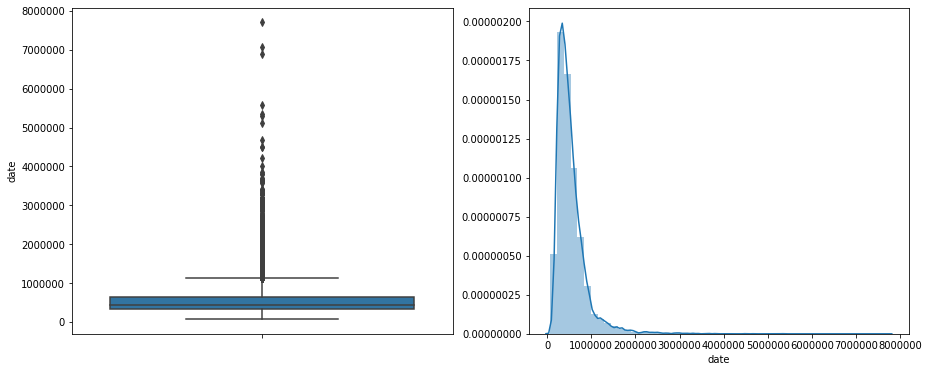

In [49]:
# let's look at the distribution of the target variable

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.boxplot(y=hp['price'])
fig.set_title('')
fig.set_ylabel(var)

plt.subplot(1, 2, 2)
fig = sns.distplot(hp['price'].dropna()) #.hist(bins=20)
fig.set_ylabel('')
fig.set_xlabel(var)

plt.show()

In [50]:
#Let's now check if our categorical variables have a huge number of categories
for var in categorical:
    print(var, ' contains ', len(hp[var].unique()), ' labels')

The price variable is also left skewed and not normally distributed.

## Data Transformation

In [97]:
type(hp.month_sold[1])

numpy.int64

In [99]:
hp.month_sold.astype('category')

0        10
1        12
2         2
3        12
4         2
5         5
6         6
7         1
8         4
9         3
10        4
11        5
12        5
13       10
14        3
15        1
16        7
17        5
18       12
19        4
20        5
21        8
22        7
23        5
24       11
25       11
26        6
27       12
28        6
29        3
         ..
21567     6
21568    12
21569     8
21570    10
21571     3
21572    11
21573     9
21574     5
21575    10
21576     4
21577     3
21578    10
21579    10
21580     8
21581     4
21582    10
21583     9
21584    10
21585     4
21586     6
21587     8
21588     1
21589    10
21590     3
21591     2
21592     5
21593     2
21594     6
21595     1
21596    10
Name: month_sold, Length: 21597, dtype: category
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]

# Further Exploration

In [54]:
#import plotly.express as px
#fig = px.bar(hp, x='year_sold', y='price')
#fig.show()

In [403]:
#import plotly.express as px

#fig = px.bar(hp, x="year_sold", y="price", color='waterfront')
#fig.show()

In [92]:
#hp.plot.bar(x='month_sold', y='price', rot=0)

In [59]:
#Whats the highest sales price?

hp.price.max()


7700000.0

In [60]:
average_price = hp.price.mean()
average_price.round()

540297.0

In [61]:
#Our client has a budget of 1.5M
hp_subset = hp.query('price > 3500000')
hp_subset.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
1162  1247600105 2014-10-20  5110000.0         5       5.25         8010   
1313  7558700030 2015-04-13  5300000.0         6       6.00         7390   
1446  8907500070 2015-04-13  5350000.0         5       5.00         8000   
2083  8106100105 2014-11-14  3850000.0         4       4.25         5770   
2624  7738500731 2014-08-15  4500000.0         5       5.50         6640   

      sqft_lot  floors  waterfront  view  ...  yr_renovated  zipcode      lat  \
1162     45517     2.0         1.0   4.0  ...           0.0    98033  47.6767   
1313     24829     2.0         1.0   0.0  ...           0.0    98040  47.5631   
1446     23985     2.0         0.0   4.0  ...           0.0    98004  47.6232   
2083     21300     2.0         1.0   4.0  ...           0.0    98040  47.5850   
2624     40014     2.0         1.0   4.0  ...           0.0    98155  47.7493   

         long  sqft_living15  sqft_lot15  year_sold  month_sold  yr_old  \
1162 -122.211           3430       26788       2014          10      21   
1313 -122.210           4320       24619       2015           4      29   
1446 -122.220           4600       21750       2015           4      11   
2083 -122.222           4620       22748       2014          11      40   
2624 -122.280           3030       23408       2014           8      16   

      sqft_total_property  
1162              55547.0  
1313              34609.0  
1446              33265.0  
2083              27070.0  
2624              46944.0  

[5 rows x 25 columns]

In [62]:
hp_subset.shape

(22, 25)

In [63]:
hp_subset.describe()

id         price   bedrooms  bathrooms   sqft_living  \
count  2.200000e+01  2.200000e+01  22.000000  22.000000     22.000000   
mean   5.393662e+09  4.625455e+06   4.772727   5.090909   7108.181818   
std    2.867094e+09  1.234962e+06   0.869144   1.370491   2012.765537   
min    8.532000e+08  3.570000e+06   3.000000   3.000000   4830.000000   
25%    2.758837e+09  3.665000e+06   4.000000   4.250000   5495.000000   
50%    5.227251e+09  4.105000e+06   5.000000   5.125000   6845.000000   
75%    7.693551e+09  5.252500e+06   5.000000   5.937500   8007.500000   
max    9.808701e+09  7.700000e+06   6.000000   8.000000  12050.000000   

           sqft_lot     floors  waterfront       view  condition  ...  \
count     22.000000  22.000000   22.000000  22.000000  22.000000  ...   
mean   25676.954545   1.909091    0.454545   2.454545   3.363636  ...   
std    10482.972059   0.332249    0.509647   1.765470   0.581087  ...   
min     8694.000000   1.000000    0.000000   0.000000   3.000000  ...   
25%    19525.000000   2.000000    0.000000   0.250000   3.000000  ...   
50%    24407.000000   2.000000    0.000000   3.500000   3.000000  ...   
75%    34093.500000   2.000000    1.000000   4.000000   4.000000  ...   
max    45517.000000   2.500000    1.000000   4.000000   5.000000  ...   

       yr_renovated       zipcode        lat        long  sqft_living15  \
count     22.000000     22.000000  22.000000   22.000000      22.000000   
mean     363.590909  98050.181818  47.627314 -122.235591    3813.636364   
std      789.451024     52.241779   0.046943    0.050714     622.242836   
min        0.000000  98004.000000  47.557000 -122.370000    2910.000000   
25%        0.000000  98006.500000  47.599375 -122.240750    3430.000000   
50%        0.000000  98039.000000  47.623050 -122.223000    3700.000000   
75%        0.000000  98040.000000  47.640550 -122.213250    4287.500000   
max     2009.000000  98177.000000  47.749300 -122.110000    5070.000000   

         sqft_lot15    year_sold  month_sold      yr_old  sqft_total_property  
count     22.000000    22.000000   22.000000   22.000000            22.000000  
mean   21256.318182  2014.272727    7.181818   34.045455         34373.318182  
std     9026.858903     0.455842    2.753982   28.112829         11664.307562  
min     8800.000000  2014.000000    1.000000   11.000000         14764.000000  
25%    15856.500000  2014.000000    5.000000   16.250000         26605.750000  
50%    20086.000000  2014.000000    7.500000   20.500000         33606.000000  
75%    24550.500000  2014.750000    9.750000   39.250000         42921.000000  
max    45302.000000  2015.000000   11.000000  110.000000         55547.000000  

[8 rows x 24 columns]

In [64]:
hp_subset.sqft_total_property.mean()

34373.318181818184

In [65]:
hp_subset.yr_old.mean()

34.04545454545455

In [66]:
hp_subset.price.mean()

4625454.545454546

In [67]:
#min price for waterfront
hp_3 = hp.groupby('waterfront').min()['price'].reset_index()
hp_3.round()

waterfront     price
0         0.0   78000.0
1         1.0  285000.0

In [68]:
hp_3 = hp.groupby('waterfront').mean()['price'].reset_index()
hp_3.round()

waterfront      price
0         0.0   532286.0
1         1.0  1717215.0

In [69]:
hp_3 = hp.groupby('waterfront').max()['price'].reset_index()
hp_3.round()

waterfront      price
0         0.0  7700000.0
1         1.0  7060000.0

In [70]:
hp_4 = hp.groupby('waterfront').max()['sqft_living'].reset_index()
hp_4.round()

waterfront  sqft_living
0         0.0        13540
1         1.0        10040

In [71]:
hp_4 = hp.groupby('waterfront').max()['sqft_living'].reset_index()
hp_4.round()

waterfront  sqft_living
0         0.0        13540
1         1.0        10040

In [78]:
hp_4 = hp.groupby('waterfront').max()['sqft_living'].reset_index()
hp_4.round()

waterfront  sqft_living
0         0.0        13540
1         1.0        10040

In [80]:
hp_subset['mansion_size'] = hp_subset.sqft_total_property > 10000
hp_subset.head(2)

/Users/student/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



id       date      price  bedrooms  bathrooms  sqft_living  \
1162  1247600105 2014-10-20  5110000.0         5       5.25         8010   
1313  7558700030 2015-04-13  5300000.0         6       6.00         7390   

      sqft_lot  floors  waterfront  view  ...  zipcode      lat     long  \
1162     45517     2.0         1.0   4.0  ...    98033  47.6767 -122.211   
1313     24829     2.0         1.0   0.0  ...    98040  47.5631 -122.210   

      sqft_living15  sqft_lot15  year_sold  month_sold  yr_old  \
1162           3430       26788       2014          10      21   
1313           4320       24619       2015           4      29   

      sqft_total_property  mansion_size  
1162              55547.0          True  
1313              34609.0          True  

[2 rows x 26 columns]

In [81]:
#pivot table with query 
table = pd.pivot_table(hp_subset.query('mansion_size == True'),
                       values='price',
                       columns=['waterfront'],
                       aggfunc=np.mean)

table

waterfront           0.0        1.0
price       4.734167e+06  4495000.0

In [82]:
table = pd.pivot_table(hp_subset.query('mansion_size == True'),
                       values='price',
                       columns=['grade'],
                       aggfunc=np.mean)

table

grade         10         11            12         13
price  3585000.0  4550000.0  4.420909e+06  5552000.0

In [83]:
table = pd.pivot_table(hp_subset.query('mansion_size == True'),
                       values='price',
                       columns=['bedrooms'],
                       aggfunc=np.mean)

table

bedrooms          3          4             5          6
price     3700000.0  3938000.0  4.648182e+06  5885000.0

In [84]:
 table = pd.pivot_table(hp_subset.query('mansion_size == True'),
                       values='price',
                       columns=['condition'],
                       aggfunc=np.mean)

table

condition          3             4          5
price      4674000.0  4.666667e+06  3650000.0

In [85]:
table = pd.pivot_table(hp_subset.query('mansion_size == True'),
                       values='price',
                       columns=['floors'],
                       aggfunc=np.mean)

table

floors        1.0        1.5           2.0        2.5
price   4235000.0  3650000.0  4.552222e+06  7700000.0

In [310]:
import plotly.express as px

df = hp_subset
fig = px.parallel_categories(df, dimensions=['waterfront', 'bedrooms', 'floors', 'condition', 'grade'],
                color="price", color_continuous_scale=px.colors.sequential.Inferno,
                labels={'price':'price', 'waterfront':'waterfront view', 'bedrooms':'number of bedrooms',  'floors': 'number of floors', 'condition': 'condition of the house','grade': 'grading' })
fig.show()

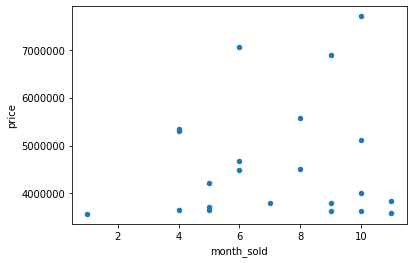

In [103]:
hp_subset.plot(x='month_sold', y='price', kind = 'scatter')

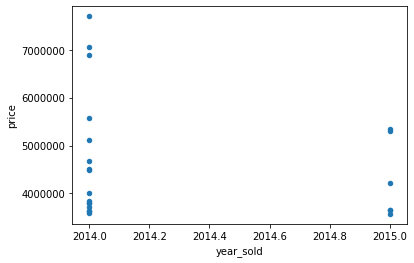

In [101]:
hp_subset.plot(x='year_sold', y='price', kind = 'scatter')

In [102]:
table = pd.pivot_table(hp_subset.query('mansion_size == True'),
                       values='price',
                       columns=['year_sold'],
                       aggfunc=np.mean)

table

year_sold       2014          2015
price      4751875.0  4.288333e+06

In [104]:
table = pd.pivot_table(hp_subset.query('mansion_size == True'),
                       values='price',
                       columns=['year_sold'],
                       aggfunc=np.max)

table

year_sold       2014       2015
price      7700000.0  5350000.0

In [105]:
table = pd.pivot_table(hp_subset.query('mansion_size == True'),
                       values='price',
                       columns=['year_sold'],
                       aggfunc=np.min)

table

year_sold       2014       2015
price      3600000.0  3570000.0

In [134]:
hp.yr_renovated.head()

0       0.0
1    1991.0
2       0.0
3       0.0
4       0.0
Name: yr_renovated, dtype: float64

# Visual Exploration

## Pairplot

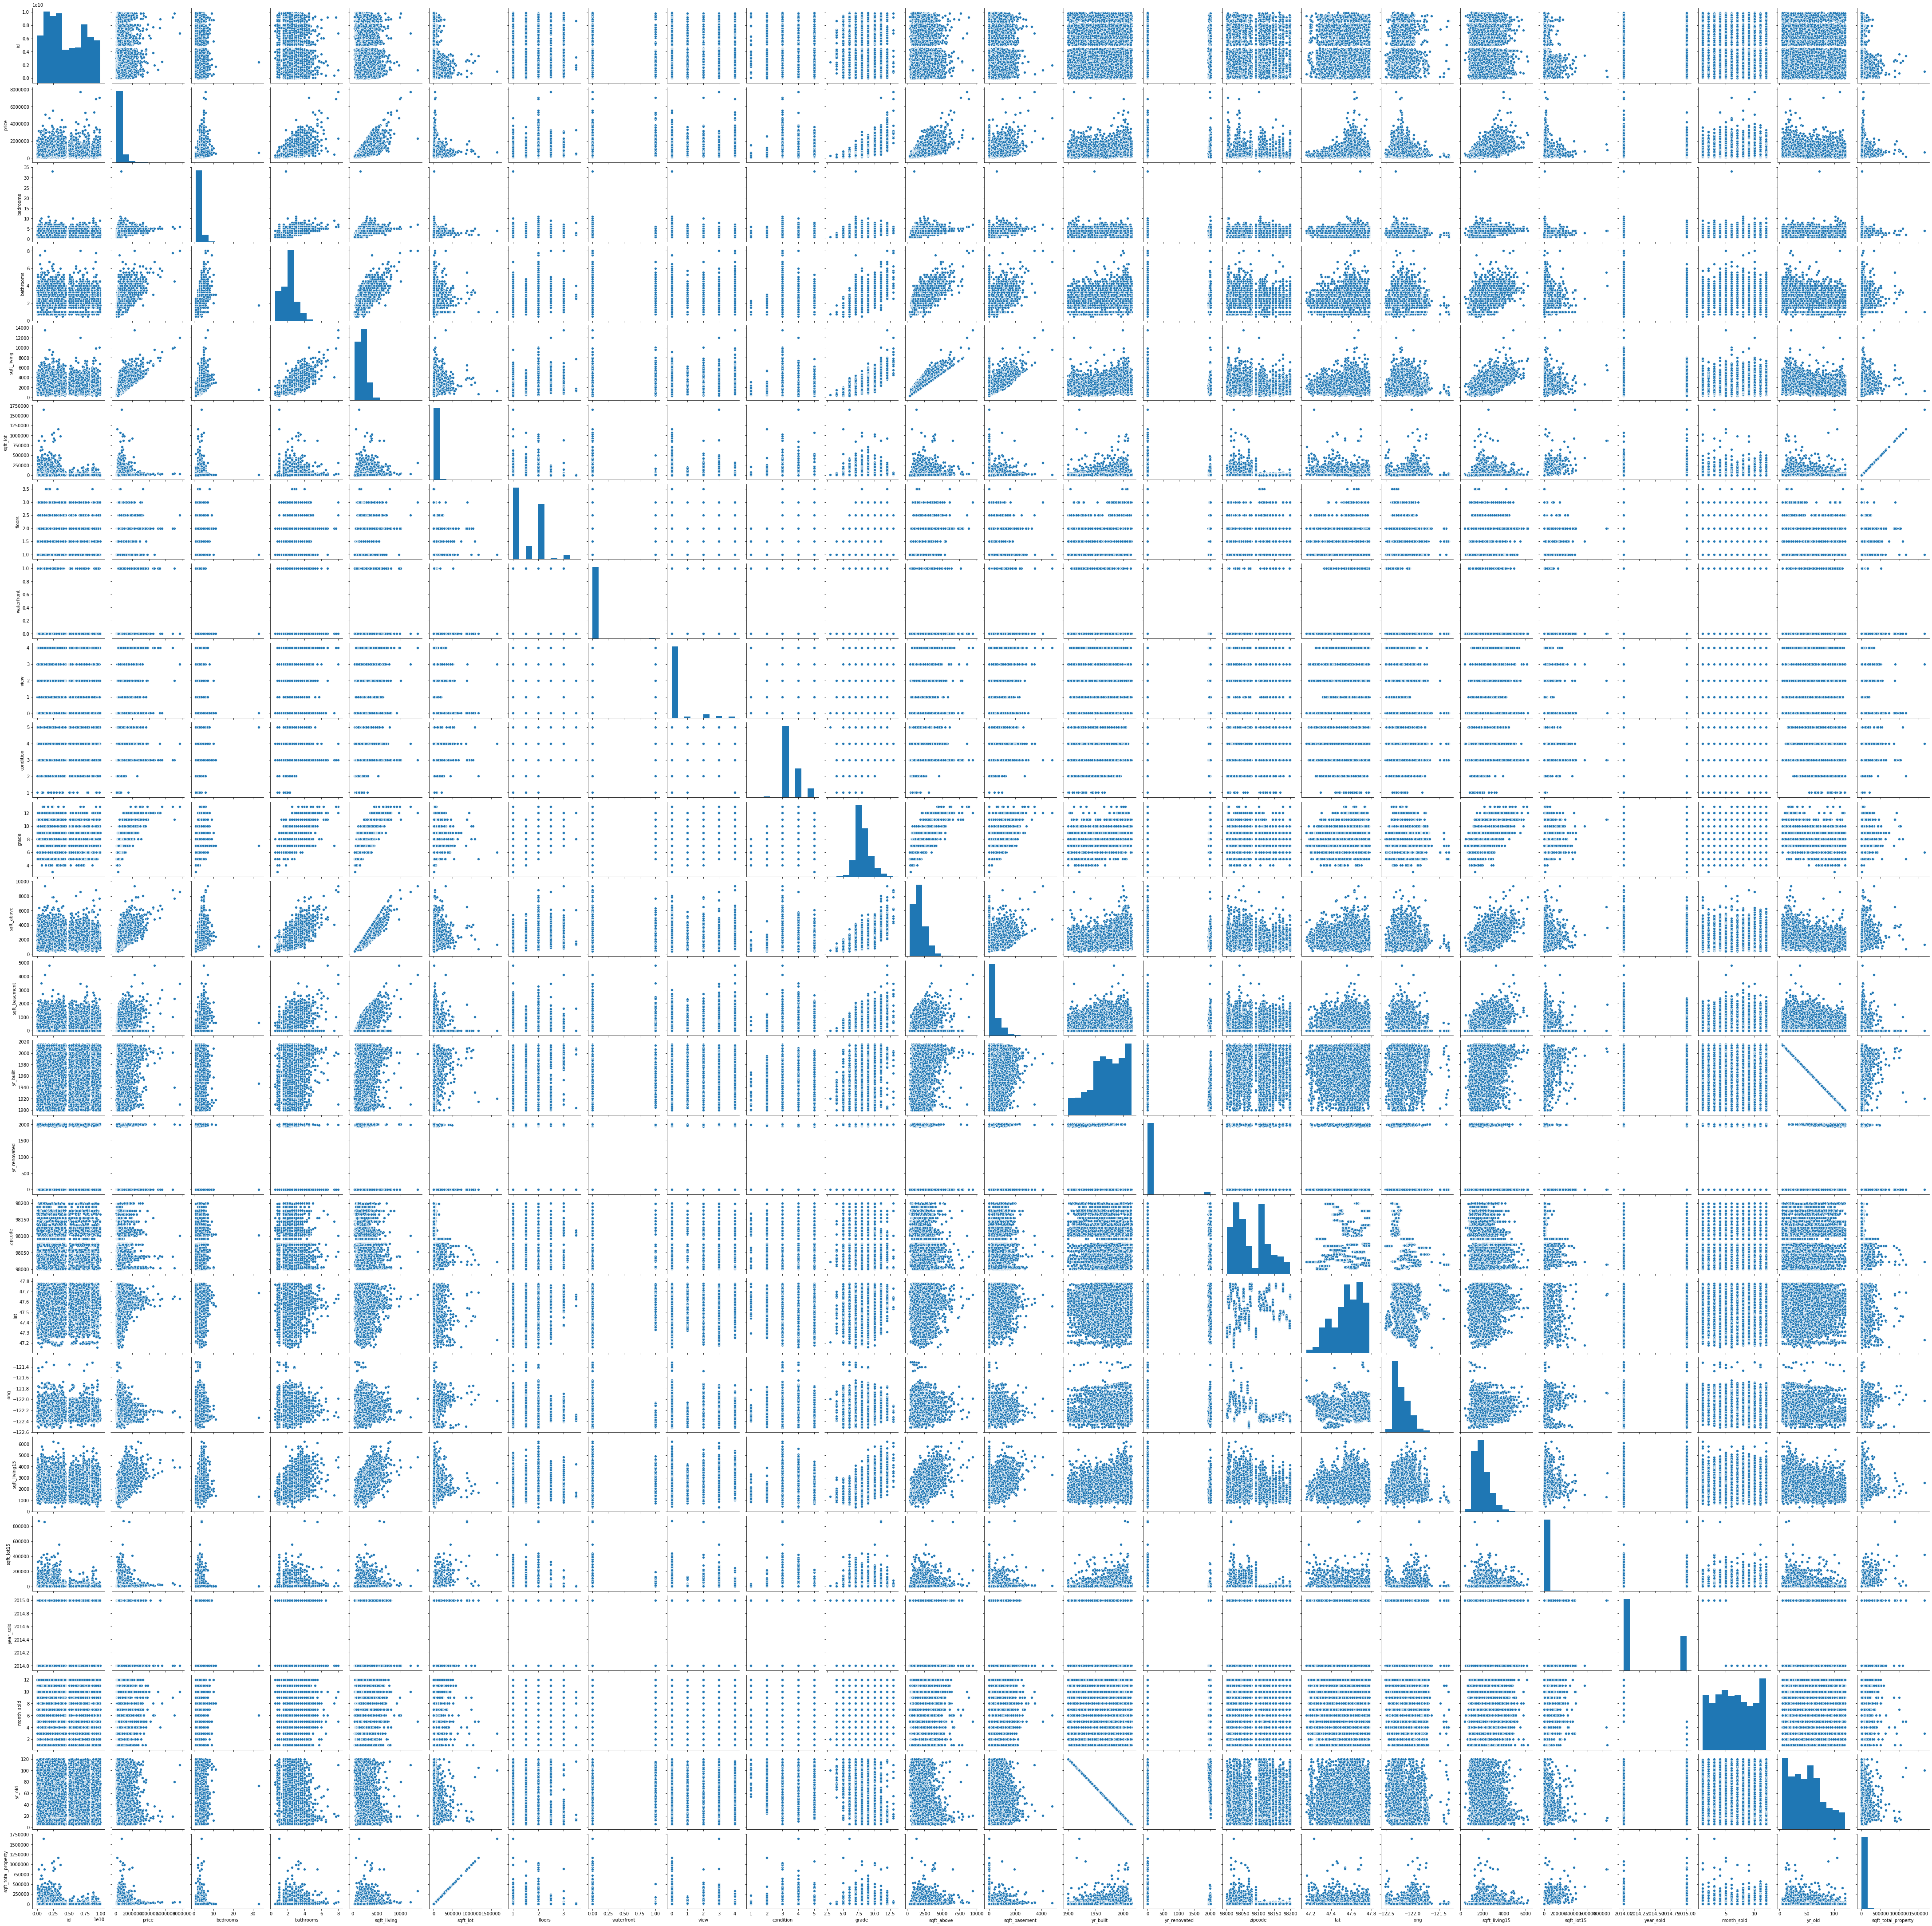

In [93]:
sns.pairplot(hp);
#plt.savefig('figures/pairplot.png')

Pairplotting is of little use in this case.

## Heatmap

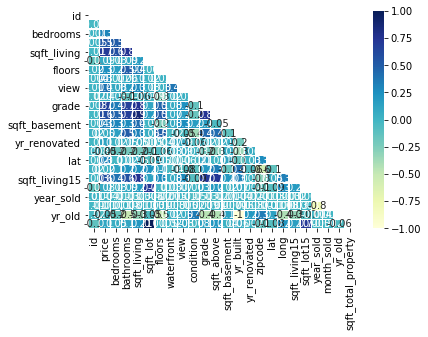

In [107]:
#el(hp['id'])
matrix = np.triu(hp.corr())
sns.heatmap(hp.corr(),
           mask=matrix,
           annot = True,
           fmt = '.1g',
           vmin=-1, 
           vmax=1, 
           center= 0,
           cmap= 'YlGnBu',
           linewidth=.1
           );



#plt.savefig('figures/correlogram.png')


## Correlation Matrix

In [108]:
corr_matrix = hp.corr()
corr_matrix['price'].sort_values(ascending=False)

price                  1.000000
sqft_living            0.701917
grade                  0.667951
sqft_above             0.605368
sqft_living15          0.585241
bathrooms              0.525906
view                   0.393497
sqft_basement          0.321108
bedrooms               0.308787
lat                    0.306692
waterfront             0.264306
floors                 0.256804
yr_renovated           0.117855
sqft_total_property    0.108371
sqft_lot               0.089876
sqft_lot15             0.082845
yr_built               0.053953
condition              0.036056
long                   0.022036
year_sold              0.003727
month_sold            -0.009928
id                    -0.016772
zipcode               -0.053402
yr_old                -0.053953
Name: price, dtype: float64

In [109]:
corr_matrix['grade'].sort_values(ascending=False)

grade                  1.000000
sqft_living            0.762779
sqft_above             0.756073
sqft_living15          0.713867
price                  0.667951
bathrooms              0.665838
floors                 0.458794
yr_built               0.447865
bedrooms               0.356563
view                   0.249082
long                   0.200341
sqft_basement          0.165843
sqft_total_property    0.132819
sqft_lot15             0.120981
sqft_lot               0.114731
lat                    0.113575
waterfront             0.082818
yr_renovated           0.015623
month_sold             0.008989
id                     0.008188
year_sold             -0.030635
condition             -0.146896
zipcode               -0.185771
yr_old                -0.447865
Name: grade, dtype: float64

## Histograms

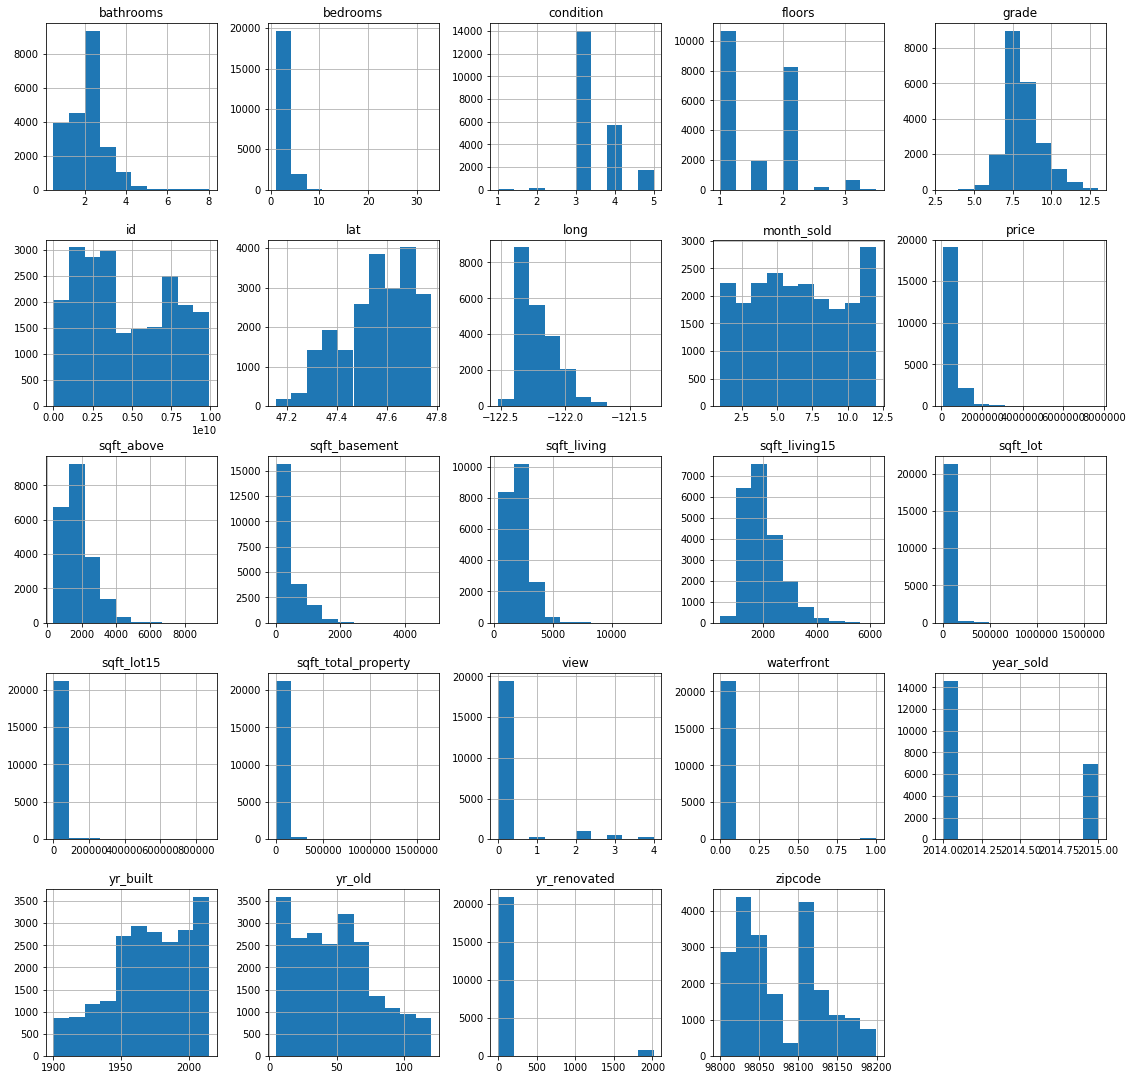

In [110]:
_ = hp.hist(figsize=(19,19))
#plt.savefig('figures/hist_all.png')

The amoung of houses with a waterfront view is very low. The same goes for houses that have been renovated. Consequently, we might use the mode for the missing values. 

## Scatterplots of the highest correlations

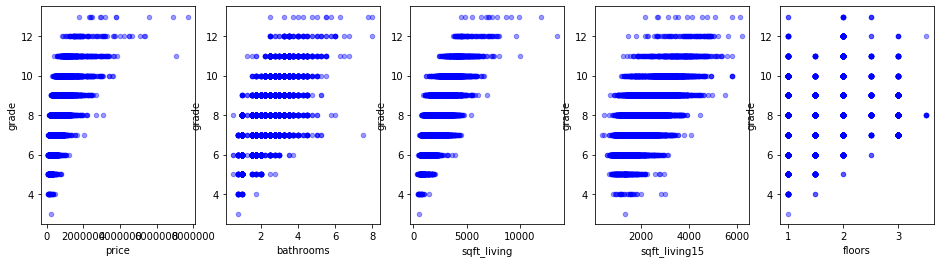

In [111]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16, 4))

for xcol, ax in zip(
    ['price', 'bathrooms', 'sqft_living', 'sqft_living15', 'floors'], axes):
    hp.plot(kind='scatter', x=xcol, y='grade', ax=ax, alpha=0.4, color='b')

In [112]:
#there are high quality houses that cost as much as some low quality houses. so what defines the price then?

In [113]:
hp[['bathrooms', 'floors']].nunique()

bathrooms    29
floors        6
dtype: int64

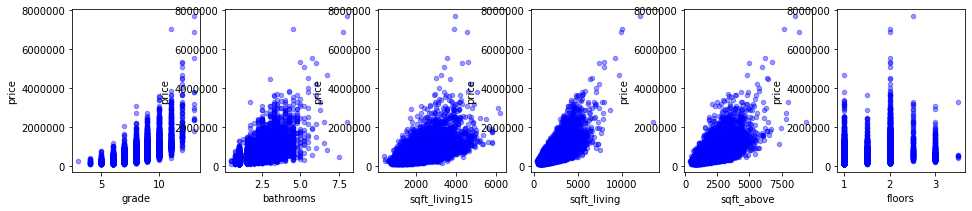

In [114]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(16, 3))

for xcol, ax in zip([
        'grade', 'bathrooms', 'sqft_living15', 'sqft_living', 'sqft_above',
        'floors'], axes):
    hp.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [115]:
hp[['grade', 'floors']].nunique()

grade     11
floors     6
dtype: int64

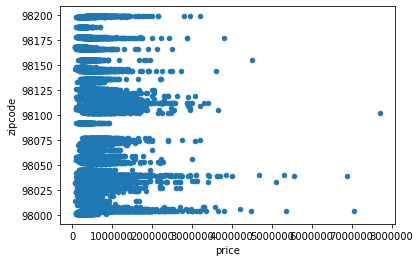

In [116]:
hp.plot(x='price', y='zipcode', kind='scatter')

## Boxplots

In [120]:
sns.boxplot(data=hp, orient='h', palette='Set2'); 

TypeError: cannot astype a datetimelike from [datetime64[ns]] to [float64]

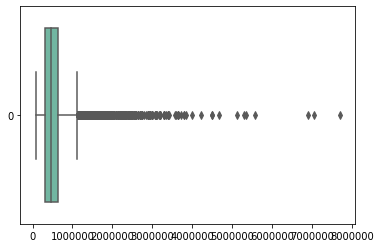

In [121]:
sns.boxplot(data=hp.price, orient='h', palette='Set2');

# Split Data

Split the data set:

In [122]:
X = hp.drop(['price', 'date'], axis = 1)
y = hp['price']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.3)
X_train.shape, X_test.shape

((15117, 23), (6480, 23))

Linear regression doesn't work on date data. 
Thus, we need to convert it into numerical value:

In [124]:
X_train.head(2)

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
753   8682300890         2       2.50         2380      6600     1.0   
1418  8073000550         4       3.75         3190     17186     2.0   

      waterfront  view  condition  grade  ...  yr_renovated  zipcode      lat  \
753          0.0   0.0          3      8  ...           0.0    98053  47.7170   
1418         1.0   4.0          3     10  ...           0.0    98178  47.5115   

         long  sqft_living15  sqft_lot15  year_sold  month_sold  yr_old  \
753  -122.020           1870        6600       2014           8      10   
1418 -122.246           2290       13496       2015           4      21   

      sqft_total_property  
753                8980.0  
1418              20376.0  

[2 rows x 23 columns]

In [125]:
y_train.head(2)

753      699800.0
1418    1700000.0
Name: price, dtype: float64

# Select Features

Return only the selected features with p_values < 0.05 for the target variable 'price':

In [126]:
X1 = sm.add_constant(X_train)
ols = sm.OLS(y_train, X1)

lr = ols.fit()

selected_features = list(X.columns)
pmax = 1
while (len(selected_features) > 0):
    X_1 = X[selected_features]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y, X_1).fit()
    p = pd.Series(model.pvalues.values[1:], index=selected_features)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if (pmax > 0.05):
        selected_features.remove(feature_with_p_max)
    else:
        break
print('The selected features for "price" are: ', selected_features)

/Users/student/opt/anaconda3/envs/nf/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



The selected features for "price" are:  ['id', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year_sold', 'yr_old', 'sqft_total_property']


# Linear Model Exploration

## Linear Model of 'price' with selected features

In [127]:
X4 = X_train[[
    'bedrooms', 'bathrooms', 'sqft_lot', 'waterfront', 'view', 'condition',
    'grade', 'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
    'long', 'sqft_living15', 'sqft_lot15', 'sqft_total_property'
]]
X4 = sm.add_constant(X4)
y4 = y_train

X4.head(n=2)

const  bedrooms  bathrooms  sqft_lot  waterfront  view  condition  \
753     1.0         2       2.50      6600         0.0   0.0          3   
1418    1.0         4       3.75     17186         1.0   4.0          3   

      grade  sqft_above  yr_built  yr_renovated  zipcode      lat     long  \
753       8        2380      2010           0.0    98053  47.7170 -122.020   
1418     10        3190      1999           0.0    98178  47.5115 -122.246   

      sqft_living15  sqft_lot15  sqft_total_property  
753            1870        6600               8980.0  
1418           2290       13496              20376.0

In [128]:
sm.OLS(y4, X4).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     2253.
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:55:08   Log-Likelihood:            -2.0599e+05
No. Observations:               15117   AIC:                         4.120e+05
Df Residuals:                   15100   BIC:                         4.122e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.172e+06   3.43e+06      1.508      0.132   -1.55e+06    1.19e+07
bedrooms            -3.699e+04   2342.640    -15.789      0.000   -4.16e+04   -3.24e+04
bathrooms            4.734e+04   3769.934     12.556      0.000    3.99e+04    5.47e+04
sqft_lot              -73.5505      2.506    -29.347      0.000     -78.463     -68.638
waterfront           6.381e+05   2.15e+04     29.679      0.000    5.96e+05     6.8e+05
view                  5.21e+04   2523.110     20.649      0.000    4.72e+04     5.7e+04
condition            2.787e+04   2789.760      9.990      0.000    2.24e+04    3.33e+04
grade                1.013e+05   2563.346     39.531      0.000    9.63e+04    1.06e+05
sqft_above             96.8345      3.753     25.804      0.000      89.479     104.190
yr_built            -2676.8406     83.577    -32.029      0.000   -2840.661   -2513.020
yr_renovated           21.1981      4.758      4.456      0.000      11.872      30.524
zipcode              -555.8593     39.030    -14.242      0.000    -632.362    -479.356
lat                  5.835e+05   1.28e+04     45.616      0.000    5.58e+05    6.09e+05
long                -2.139e+05   1.55e+04    -13.777      0.000   -2.44e+05   -1.84e+05
sqft_living15          27.7104      4.101      6.757      0.000      19.671      35.749
sqft_lot15             -0.4205      0.086     -4.882      0.000      -0.589      -0.252
sqft_total_property    73.6415      2.504     29.415      0.000      68.734      78.549
==============================================================================
Omnibus:                    12294.536   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           971340.957
Skew:                           3.387   Prob(JB):                         0.00
Kurtosis:                      41.681   Cond. No.                     2.18e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Remove variables with t<10.: 'bathrooms', 'condition', 'yr_renovated', 'sqft_living15', 'sqft_lot15'

# Scale Data

In [129]:
from sklearn.preprocessing import StandardScaler 
# Initialise the Scaler 
scaler = StandardScaler() 
  
# To scale data 
scaler.fit(X_train) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [130]:
import math 


hp['log_price'] = [math.log(float(p)) for p in hp.price]

hp.head(2)

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   

   sqft_lot  floors  waterfront  view  ...  zipcode      lat     long  \
0      5650     1.0         0.0   0.0  ...    98178  47.5112 -122.257   
1      7242     2.0         0.0   0.0  ...    98125  47.7210 -122.319   

   sqft_living15  sqft_lot15  year_sold  month_sold  yr_old  \
0           1340        5650       2014          10      65   
1           1690        7639       2014          12      69   

   sqft_total_property  log_price  
0               6830.0  12.309982  
1              10212.0  13.195614  

[2 rows x 26 columns]

## Repeat Linear Model with Scaled Data

The R-squared improves after scaling the features:

In [131]:
X = hp.drop(['log_price', 'price', 'date'], axis = 1)
y = hp['log_price']

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.3)
X_train.shape, X_test.shape

((15117, 23), (6480, 23))

In [133]:
X4 = X_train[[
    'bedrooms', 'bathrooms', 'sqft_lot', 'waterfront', 'view', 'condition',
    'grade', 'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
    'long', 'sqft_living15', 'sqft_lot15', 'sqft_total_property'
]]
X4 = sm.add_constant(X4)
y4 = y_train

sm.OLS(y4, X4).fit().summary()

/Users/student/opt/anaconda3/envs/nf/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     3177.
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:55:15   Log-Likelihood:                -654.51
No. Observations:               15117   AIC:                             1343.
Df Residuals:                   15100   BIC:                             1473.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -14.4245      4.327     -3.334      0.001     -22.906      -5.943
bedrooms               -0.0151      0.003     -5.122      0.000      -0.021      -0.009
bathrooms               0.0898      0.005     18.877      0.000       0.080       0.099
sqft_lot            -5.992e-05   3.16e-06    -18.957      0.000   -6.61e-05   -5.37e-05
waterfront              0.4131      0.027     15.234      0.000       0.360       0.466
view                    0.0594      0.003     18.660      0.000       0.053       0.066
condition               0.0601      0.004     17.072      0.000       0.053       0.067
grade                   0.1650      0.003     51.035      0.000       0.159       0.171
sqft_above           8.428e-05   4.73e-06     17.807      0.000     7.5e-05    9.36e-05
yr_built               -0.0032      0.000    -30.785      0.000      -0.003      -0.003
yr_renovated         4.232e-05      6e-06      7.053      0.000    3.06e-05    5.41e-05
zipcode                -0.0006   4.92e-05    -11.792      0.000      -0.001      -0.000
lat                     1.3986      0.016     86.686      0.000       1.367       1.430
long                   -0.1814      0.020     -9.263      0.000      -0.220      -0.143
sqft_living15        9.602e-05   5.17e-06     18.563      0.000    8.59e-05       0.000
sqft_lot15          -3.479e-07   1.09e-07     -3.203      0.001   -5.61e-07   -1.35e-07
sqft_total_property  6.035e-05   3.16e-06     19.113      0.000    5.42e-05    6.65e-05
==============================================================================
Omnibus:                      207.665   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              388.084
Skew:                          -0.014   Prob(JB):                     5.35e-85
Kurtosis:                       3.784   Cond. No.                     2.18e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [336]:
import statsmodels.formula.api as smf
rs = smf.ols(formula='price ~ grade', data=hp).fit().rsquared
f'{rs:.3}'

'0.446'

scaling and log improves R suqared 

In [343]:
olsm = sm.OLS(y_train, X_train).fit()

In [350]:
predictions = olsm.predict(X_train)

ValueError: shapes (15117,21) and (17,) not aligned: 21 (dim 1) != 17 (dim 0)

In [349]:
print(predictions)

753      13.225485
1418     14.164381
8178     12.604720
2254     12.417587
4063     12.923002
20396    13.030745
16030    13.819408
21212    12.652836
6933     13.424687
6442     12.312788
9841     13.333915
17178    12.953970
4244     13.330257
15783    12.871763
2438     13.126408
20699    12.921578
2069     13.749298
16415    13.624360
12029    12.505274
5224     13.295272
15290    13.237609
18620    12.259938
13644    12.345110
1078     12.740530
14979    12.348289
2175     13.653243
4125     13.089142
624      12.771563
5083     12.498336
16962    12.578299
           ...    
3005     12.962025
19118    13.771475
189      13.247302
2747     13.729418
18431    12.681119
18942    13.445646
8666     12.720950
6396     14.581460
19769    12.807132
20939    12.841786
17568    13.324381
6420     12.511369
5051     12.948126
5311     12.985433
2433     12.877026
769      13.335153
1685     12.947809
8322     14.178028
16023    13.376513
11363    13.089778
14423    12.593566
4426     13.

# Train-Test Evaluation

In [340]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [341]:
prediction = lm.predict(X_test)

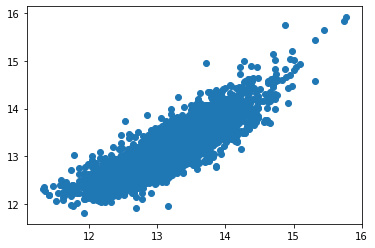

In [342]:
plt.scatter(y_test, prediction)

# Check multicollinearity of 'grade'

*In statistics, multicollinearity (also collinearity) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy. In this situation, the coefficient estimates of the multiple regression may change erratically in response to small changes in the model or the data. Multicollinearity does not reduce the predictive power or reliability of the model as a whole, at least within the sample data set; it only affects calculations regarding individual predictors. That is, a multivariate regression model with collinear predictors can indicate how well the entire bundle of predictors predicts the outcome variable, but it may not give valid results about any individual predictor, or about which predictors are redundant with respect to others.*  - Wikipedia article on Multicollinearity

What does the grading system do? How is it related to the evaluated variables?

The **Variance Inflation Factor (VIF)** shows the strength of the correlation between the independent variables. 
It takes a variable and regresses it against every other variable.

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
#define data

df = X_train[['bedrooms', 'bathrooms', 'sqft_lot', 'waterfront', 'view', 'condition',
    'grade', 'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
    'long', 'sqft_living15', 'sqft_lot15', 'sqft_total_property']].dropna()

In [64]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X_train.columns
    vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

    return(vif)

In [65]:
X = X_train.iloc[:,:-1]
calc_vif(X)

/Users/student/opt/anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


variables         VIF
0                    id    3.632780
1              bedrooms    1.705164
2             bathrooms    3.420855
3           sqft_living         inf
4              sqft_lot         inf
5                floors    1.963175
6            waterfront    1.176830
7                  view    1.392290
8             condition    1.217166
9                 grade    3.409732
10           sqft_above  125.792748
11        sqft_basement         inf
12             yr_built    2.078602
13         yr_renovated    1.116003
14              zipcode    0.487072
15                  lat    1.184677
16                 long    1.815386
17        sqft_living15    2.937174
18           sqft_lot15    2.063140
19  sqft_total_property         inf

Among the data, the King County grading system is strongly associated with the numbers of floors, bathrooms, squarefeet of living space, the squarfeet of living space in the closest 15 neighbors, as well as with the year the hous was built.

This regression has a R squared below 0.7 . It does not change by removing independent variables. 

On  *https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r* it says:

*BUILDING GRADE*
- Represents the construction quality of improvements. 
- Grades run from grade 1 to 13. Generally defined as:

**1-3** Falls short of minimum building standards. Normally cabin or inferior structure.

**4** Generally older, low quality construction. Does not meet code.

**5** Low construction costs and workmanship. **Small**, simple design.

**6** Lowest grade currently meeting building code. Low quality materials and simple designs.

**7** **Average grade of construction** and design. Commonly seen in plats and **older** sub-divisions.

**8** Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

**9** **Better architectural** design with extra interior and exterior design and quality.

**10** Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a **larger square footage**.

**11** Custom design and higher quality finish work with added amenities of solid woods, **bathroom fixtures and more luxurious options**.

**12** **Custom design and excellent builders**. All materials are of the highest quality and all conveniences are present.

**13** Generally custom designed and built. **Mansion level**. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.